<a href="https://colab.research.google.com/github/Spencer-A-Miller/Applied-Machine-Learning/blob/main/HWK_2_Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Spencer Miller
#sam190004
#Homework 2 for EE 4331 Applied Machine Learning

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import keras

In [2]:
#Load in the MNIST data set

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#Viewing the shape of the data
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

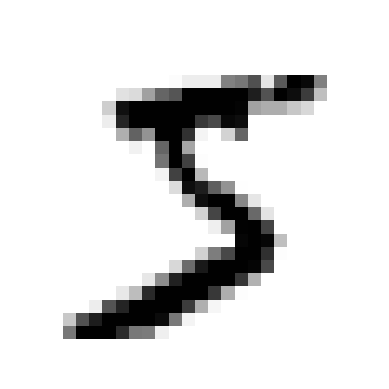

In [5]:
#Load in one digit to use as an example

some_digit = X.to_numpy()[0]

#Reshape the digit into a 28 x 28 pixel array to display.
some_digit_image = some_digit.reshape(28, 28)

#Plot digit

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y = y.astype(np.uint8)

In [6]:
#Split the data into a training and test data set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#y_test[60000]


In [7]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [8]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

#Prints the highest scoring preditction
np.argmax(some_digit_scores)

#Prints an array with every class some_digit could be. 
svm_clf.classes_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
#cross-validation. Use the cross_val_score() function to evaluate the SGDClassifier’s accuracy:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

#Test data is 97.7% accurate

array([0.977 , 0.9738, 0.9739])

In [10]:
cross_val_score(svm_clf, X_test, y_test, cv=3, scoring="accuracy")

array([0.93491302, 0.95229523, 0.96669667])